# load libraries

In [2]:
# numpy
import numpy as np
np.set_printoptions(precision=2) # 用于设置浮点数在显示时的精度为两位小数

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
    # 对于小到中等规模的数据集，LinearRegression 往往是更好的选择；
    # 而对于非常大的数据集或需要频繁更新模型的应用，SGDRegressor 可能更合适。
from sklearn.preprocessing import StandardScaler
    # perform z-score normalization
from sklearn.model_selection import train_test_split
    # 允许你按指定的比例随机分割数据集，通常分为训练数据和测试数据。这是用来验证和测试模型性能的标准实践，有助于检测模型是否过拟合训练数据
from sklearn.metrics import mean_squared_error, r2_score
    # 导入两种评估回归模型性能的常用指标：均方误差（Mean Squared Error, MSE）和 R² 得分（R-squared score，或称为决定系数）

# load dataset

In [3]:
# csv文件用这段代码
data = pd.read_csv('Student_Performance.csv')

# check data

In [4]:
# 显示数据结构
data.shape

(10000, 6)

In [5]:
# 显示数据的前几行，以检查数据是否正确读取
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
# 显示变量类型
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

# data pre-processing

In [7]:
# 处理分类特征

# 方法1：标签编码（Label Encoding）：当特征是二分类的（比如“是”和“否”）时：
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# 方法2：独热编码（One-Hot Encoding）：创建新的列来表示分类变量的可能值。每一列对应一个可能的值，该列中的值为1时表示该行数据为该值，否则为0
# 如果类别特征具有三个或更多不同的值，并且这些值之间没有内在的顺序（例如颜色、类型等），那么使用独热编码可能更合适
# data = pd.get_dummies(data, columns=['Extracurricular Activities'])

In [8]:
# 再次查看是否处理成功
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [9]:
# 再次查看是否处理成功
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

# split data

In [10]:
# 定义特征列和目标列
X = data.drop('Performance Index', axis=1) # 去掉target列，剩下的是features
y = data['Performance Index'] # 单独拿出target列
X_features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

print(X) # 需要时可查看
# print(y)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [11]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 将数据集分割为训练集和测试集，通常使用70%-30%或80%-20%的比例
# test_size=0.2 指定了测试集应占总数据集的 20%。这意味着剩余的 80% 数据将用作训练集。
# random_state=42 是一个随机数种子，用于控制数据分割的随机性。设置这个参数可以确保每次运行代码时数据的分割方式相同，这有助于实验结果的可重复性。

# method 1: LinearRegression

## create model

**no require normalization**

In [12]:
# 创建线性回归模型
model_lr = LinearRegression()

# 训练模型(notice: X must be a 2-D Matrix!)
model_lr.fit(X_train, y_train)

LinearRegression()

## View Parameters 

In [13]:
# 获取模型的系数和截距
w_lr = model_lr.coef_
b_lr = model_lr.intercept_

# 打印系数和截距
print("模型系数:", w_lr)
print("截距:", b_lr)

模型系数: [2.85 1.02 0.61 0.48 0.19]
截距: -33.92194621555637


In [14]:
# 将特征名和对应的系数打印出来
feature_names = X.columns
coefficients_lr = model_lr.coef_
feature_coefficients_lr = zip(feature_names, coefficients_lr)
print("特征和对应的系数:")
for feature_lr, coef_lr in feature_coefficients_lr:
    print(f"{feature_lr}: {coef_lr}")
print(f"截距: {model_lr.intercept_}")

特征和对应的系数:
Hours Studied: 2.852483930072587
Previous Scores: 1.0169881989329308
Extracurricular Activities: 0.6086166795764204
Sleep Hours: 0.4769414841762726
Sample Question Papers Practiced: 0.191831441450543
截距: -33.92194621555637


## evaluate model

**均方误差 (MSE)：**

- 均方误差是实际值和预测值之差的平方的平均值。

- MSE越小，表示模型的预测越接近真实数据。

**决定系数 (R²)：**

- 决定系数是衡量模型解释数据变异的能力的指标。

- 其值通常在 0 到 1 之间，接近 1 表示模型能够很好地解释目标变量的变化，接近 0 则表示解释力弱。

In [15]:
# 进行预测
y_pred_lr = model_lr.predict(X_test)

# 评估模型
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("均方误差 (MSE):", mse_lr)
print("决定系数 (R²):", r2_lr)

均方误差 (MSE): 4.082628398521854
决定系数 (R²): 0.9889832909573145


## plot

X_train shape: (8000, 5)
y_train shape: (8000,)
y_tr_pred_lr shape: (8000,)
Number of subplots: 5


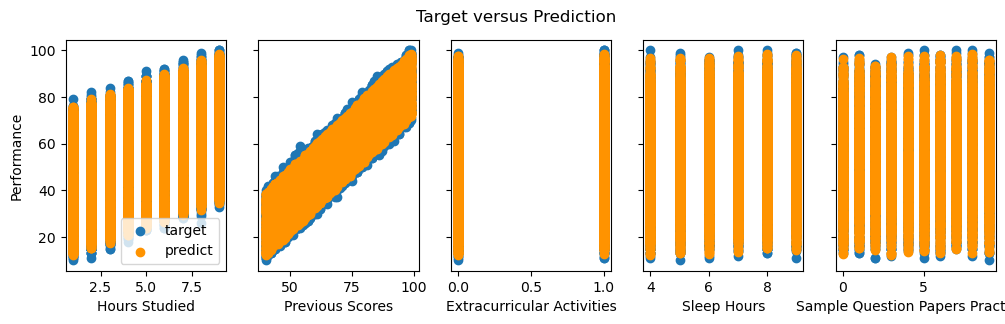

In [16]:
# 为画图，求下X_train的预测值y_tr_pred_lr，把他与y_train对比
y_tr_pred_lr = model_lr.predict(X_train)


# 确认数据的形状，比如保证行数相等才行
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_tr_pred_lr shape:", y_tr_pred_lr.shape)

# 创建子图网格
fig, ax = plt.subplots(1, len(X_features), figsize=(12, 3), sharey=True)

# 检查循环的长度
print("Number of subplots:", len(ax))

# 绘制散点图
for i, feature in enumerate(X_features):
    ax[i].scatter(X_train[feature], y_train, label='target')
    ax[i].scatter(X_train[feature], y_tr_pred_lr, color='#FF9300', label='predict')
    ax[i].set_xlabel(feature)

# 设置纵轴标签和标题
ax[0].set_ylabel("Performance")
ax[0].legend()
fig.suptitle("Target versus Prediction")
plt.show()

## prediction

In [38]:
# 假设 new_features 是你要预测的新特征集
new_features = np.array([[8, 66, 1, 8, 4],
 [8, 92, 0, 9, 2]])

# 使用LinearRegression模型预测
predicted_values_lr = model_lr.predict(new_features)

print(predicted_values_lr)

[61.21 87.14]


d:\python\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# method 2: SGDRegressor

## Scale/normalize the training data

In [18]:
# 数据标准化
scaler = StandardScaler()

# 注意：只在训练集上fit
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 使用相同的标准化参数应用于测试集


# print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
# # np.ptp的作用是计算 X_train 数组在指定轴（这里是 axis=0，即沿着每列）上的数值范围（peak to peak，即最大值与最小值之差）。
# print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_scaled,axis=0)}")

## create model

In [19]:
model_sgd = SGDRegressor(max_iter=10000) # , tol=1e-3
# max_iter：这是一个整数，指定最大迭代次数
# tol：这是一个浮点数，指定了停止训练前损失值必须达到的改进阈值。
    # 简单来说，如果在一次迭代后模型的损失减少小于这个阈值（1e-3 或 0.001），训练过程将提前停止。
    # 这是一个早停机制，用来避免过多无效的计算，并在模型不再显著提升时停止训练。
model_sgd.fit(X_train_scaled, y_train)

print(f"number of iterations completed: {model_sgd.n_iter_}, number of weight updates: {model_sgd.t_}")
# model_sgd.n_iter_：这个属性表示模型实际完成的迭代次数
# model_sgd.t_：这个属性显示在训练过程中进行的权重更新次数
    # 每次迭代中，SGD 会用一个（或一小批）样本来更新模型的权重，t_ 表示从训练开始到结束，总共进行了多少次这样的更新。
    # 这个数字通常等于训练样本数量乘以迭代次数，
    # 但如果使用了小批量（mini-batch）训练方法，这个数字会相应地调整。

number of iterations completed: 8, number of weight updates: 64001.0


## View parameters

In [20]:
# 获取模型的系数和截距
w_sgd = model_sgd.coef_
b_sgd = model_sgd.intercept_

# 打印系数和截距
print("模型系数:", w_sgd)
print("截距:", b_sgd)

模型系数: [ 7.44 17.61  0.28  0.83  0.56]
截距: [55.33]


In [21]:
# 将特征名和对应的系数打印出来
feature_names = X.columns
coefficients_sgd = model_sgd.coef_
feature_coefficients_sgd = zip(feature_names, coefficients_sgd)
print("特征和对应的系数:")
for feature_sgd, coef_sgd in feature_coefficients_sgd:
    print(f"{feature_sgd}: {coef_sgd}")
print(f"截距: {model_sgd.intercept_}")

特征和对应的系数:
Hours Studied: 7.4373937615650565
Previous Scores: 17.610190354384383
Extracurricular Activities: 0.2757011197248147
Sleep Hours: 0.8319403202206994
Sample Question Papers Practiced: 0.5566182180189096
截距: [55.33]


## evaluate model

In [22]:
# 在测试集上预测
y_pred_sgd = model_sgd.predict(X_test_scaled)

# 评估模型
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("均方误差 (MSE):", mse_sgd)
print("决定系数 (R²):", r2_sgd)

均方误差 (MSE): 4.095560022547416
决定系数 (R²): 0.9889483958051154


## plot

X_train_scaled shape: (8000, 5)
y_train shape: (8000,)
y_tr_pred_sgd shape: (8000,)
Number of subplots: 5


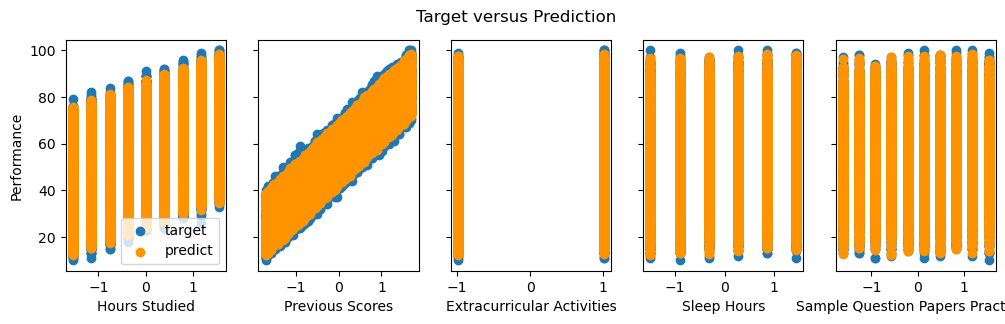

In [23]:
# 为画图，求下X_train_scaled的预测值y_tr_pred_sgd，把他与y_train对比
y_tr_pred_sgd = model_sgd.predict(X_train_scaled)


# 确认数据的形状，比如保证行数相等才行
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_tr_pred_sgd shape:", y_tr_pred_sgd.shape)

# 创建子图网格
fig, ax = plt.subplots(1, len(X_features), figsize=(12, 3), sharey=True)

# 检查循环的长度
print("Number of subplots:", len(ax))

# 绘制散点图
for i, feature in enumerate(X_features):
    ax[i].scatter(X_train_scaled[:, i], y_train, label='target')
    ax[i].scatter(X_train_scaled[:, i], y_tr_pred_sgd, color='#FF9300', label='predict')
    ax[i].set_xlabel(feature)

# 设置纵轴标签和标题
ax[0].set_ylabel("Performance")
ax[0].legend()
fig.suptitle("Target versus Prediction")
plt.show()

## prediction

In [45]:
# 假设 new_features 是你要预测的新特征集
new_features_sgd = np.array([[8, 8, 1, 8, 4],
 [8, 92, 0, 9, 2]])

new_features_scaled = scaler.fit_transform(new_features_sgd)

# 使用LinearRegression模型预测
predicted_values_sgd = model_sgd.predict(new_features_scaled)

print(predicted_values_sgd)

[37.73 72.94]
